In [1]:
# TODO: handle rgb or bw images
# TODO: slice edges and get median of the rows to find ridges
# TODO see how uri calculated the ridges


In [9]:
%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

def crop(image, ymin, ymax, xmin, xmax):
    return image[ymin:ymax, xmin:xmax]

def thresholded(image, val): 
    return np.logical_and(*[image[...] > val  for t in enumerate([0, 0])])

def find_min_max_without_orphand_pixels(nonzero_dimension, crop_filter=20):
    sorted = np.sort(nonzero_dimension)
    prev=-1
    min_val = sorted[0]
    for i, x in enumerate(sorted[:100]):
        if prev >= 0 and x - prev > crop_filter:
            min_val = x
        prev = x
    prev=-1
    max_val = sorted[-1]
    for i, x in enumerate(sorted[-100:]):
        if prev >= 0 and x - prev > crop_filter:
            max_val = prev
            break
        prev = x
    
    return min_val, max_val

def calc_min_max_coordinates(image, crop_val=50):
    temp = thresholded(image, crop_val)
    temp = temp * 1
    temp = np.nonzero(temp)
    ymin, ymax = find_min_max_without_orphand_pixels(temp[0])
    xmin,xmax = find_min_max_without_orphand_pixels(temp[1])
    return ymin, ymax, xmin, xmax

def crop_full_scan(image):
    temp = crop(image, 600, 4300, 1000, 6000)
    ymin, ymax, xmin, xmax = calc_min_max_coordinates(temp)
    temp = crop(image, 600+ymin, 600+ymax, 1000+xmin, 1000+xmax)
    return temp

def crop_thresholded(image):
    temp = crop(image, 0, image.shape[0]-1, 0, image.shape[1]-1)
    ymin, ymax, xmin, xmax = calc_min_max_coordinates(temp)
    temp = crop(image, ymin, ymax, xmin, xmax)
    return temp

# TODO: fix performance!!! http://scikit-image.org/docs/dev/user_guide/tutorial_parallelization.html
def combine_3_images_to_RGB(red, green, blue):
    new_image = np.empty((blue.shape[0],blue.shape[1],3))
    for x in range(0, blue.shape[0]):
        for y in range(0, blue.shape[1]):
            new_image[x,y,0] = red[x,y]
            new_image[x,y,1] = green[x,y]
            new_image[x,y,2] = blue[x,y]
    return new_image

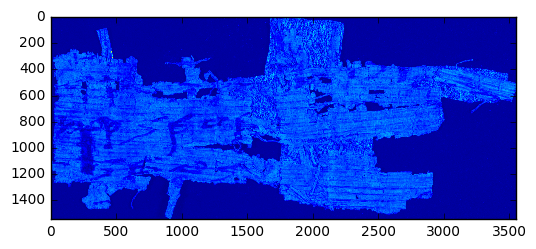

In [98]:
# Read the blue wave-length image
blue = img.imread("/Users/il239838/Downloads/private/Thesis/Papyrus/jm_4a36716c764b6d6b4c442f464b3342347436653838673d3d/P598-Fg009-R/P598-Fg009-R-C01-R01-D07012014-T124136-LR445__001.jpg")

# Smart-crop the image to get rid of all the noise and redundant area
blue = crop_full_scan(blue)

# Show the relevant image
plt.imshow(blue)


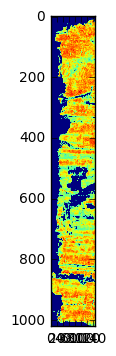

In [99]:
# Slice the left 150 px of the so-called "blue" image
left_edge_orig = crop(blue, 1, 1400, 1, 150)
left_edge_orig = crop_thresholded(left_edge_orig)

# Copy to a new array so we don't thrash the origin
left_edge = np.empty_like (left_edge_orig)
np.copyto(left_edge, left_edge_orig)

# Zero down low level "noise" values
low_values_indices = left_edge < 30  # Where values are low
left_edge[low_values_indices] = 0  # All low values set to 0

# show the left side filtered image
plt.imshow(left_edge)


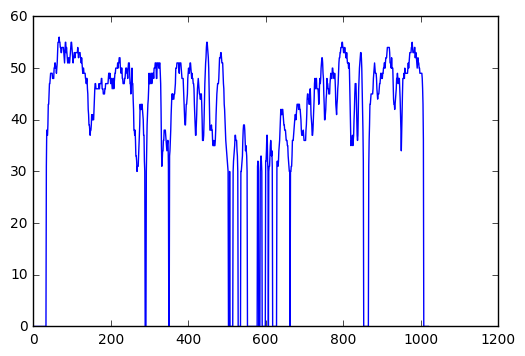

In [100]:
# Get the median for each row
left_med = np.median(left_edge, axis=1)

# Draw the median graph - reflecting a kind of a ridges fingerprint
plt.plot(left_med)

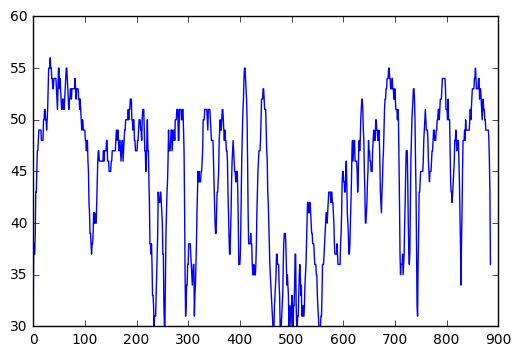

In [101]:
# All non zero values are potetial ridges
ridges = np.nonzero(left_med > 0)

# plot only the filtered ridges
plt.plot(left_med[ridges])
